# Import

In [101]:
# basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [102]:
# # data visualization
# import seaborn as sns
# import matplotlib.colors as mat_colors
# from mpl_toolkits.mplot3d import Axes3D
# from autoviz.AutoViz_Class import AutoViz_Class
# from IPython.display import SVG

In [103]:
import spacy
import re

In [104]:
link_train = "https://raw.githubusercontent.com/Pieter414/Projects/main/dataset_penyisihan_bdc_2024(in).csv"
link_test = "https://raw.githubusercontent.com/Pieter414/Projects/main/dataset_unlabeled_penyisihan_bdc_2024(in).csv"

In [105]:
train_df = pd.read_csv(link_train, delimiter=";")
test_df = pd.read_csv(link_test, delimiter=";")

# Overview

In [106]:
train_df

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik
...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan


In [107]:
test_df

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...
...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan..."
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...


In [108]:
print(train_df.shape)
print(test_df.shape)

(5000, 2)
(1000, 2)


In [109]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IDText  1000 non-null   object
 1   Text    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [110]:
train_df.describe()

,text,label
count,5000,5000
unique,4583,8
top,RT Abah Anies ingin mengangkat martabat petani...,Politik
freq,42,2972


In [111]:
test_df.describe()

,IDText,Text
count,1000,1000
unique,1000,1000
top,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
freq,1,1


In [112]:
train_df.isna().sum()

text     0
label    0
dtype: int64

In [113]:
train_df.duplicated().sum()

381

In [114]:
test_df.duplicated().sum()

0

In [115]:
train_df[train_df.duplicated()]

,text,label
57,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
104,"RT Anak Muda Indonesia, the future of this nat...",Ideologi
145,"RT Pupuk bersubsidi langka, Tim Prabowo Gibran...",Ekonomi
146,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
189,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
...,...,...
4917,"RT Ini kejam, warga disitu sudah bersedia diba...",Sosial Budaya
4933,RT Karena program pak anies yg ini. Bapak gw j...,Sumber Daya Alam
4955,RT Ekonom: Program Makan Siang dan Susu Gratis...,Ekonomi
4971,"RT menjelang tengah malam ini, aku mau ucapkan...",Ideologi


In [116]:
all_duplicated_texts = train_df[train_df['text'].duplicated(keep=False)]

print("\nDetailed comparison of duplicated text entries:")
grouped = all_duplicated_texts.groupby('text')
for name, group in grouped:
    print(f"\nText: {name}")
    print(group)


Detailed comparison of duplicated text entries:

Text: @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= @gqAL2HIcdWKR2U/VFUq3R0TFxXxtxCsKyUXAKn9R5o0= Iya nih penting suara Batak sebagai populasi etnis ketiga terbesar setelah Jawa Sunda. Mayoritas Batak Kristen cukup anti sama Anies karena diframing radikal sejak
                                                   text      label
1967  @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= ...  Demografi
3844  @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= ...  Demografi

Text: Adi menginformasikan bahwa isu utama di kampung mereka adalah sulitnya mendapatkan air bersih dan masalah naiknya air laut. #IndonesiaSentris #IndonesiaHijau #02Melanjutkan #AnakMudaIndonesiaEmas Prabowo Subianto
                                                   text             label
1028  Adi menginformasikan bahwa isu utama di kampun...  Sumber Daya Alam
1311  Adi menginformasikan bahwa isu utama di kampun...  Sumber Daya Alam
2644  Adi menginformasikan bahwa isu utama di

In [117]:
train_df.nunique()

text     4583
label       8
dtype: int64

In [118]:
train_df['label'].value_counts()

label
Politik                    2972
Sosial Budaya               587
Pertahanan dan Keamanan     400
Ideologi                    400
Ekonomi                     367
Sumber Daya Alam            192
Demografi                    62
Geografi                     20
Name: count, dtype: int64

# Preprocessing

In [119]:
def counter_word(df):
  counter = df_clean_label['text'].apply(lambda x:str(x).split())
  top = Counter([item for sublist in counter for item in sublist])
  temp = pd.DataFrame(top.most_common(20))
  temp.columns = ['Common_words','count']
  return temp.style.background_gradient(cmap='Blues')


def counter_word2(df, num):
  counter = df_clean_label['text'].apply(lambda x:str(x).split())
  top = Counter([item for sublist in counter for item in sublist if len(item) > num])
  temp = pd.DataFrame(top.most_common(100))
  temp.columns = ['Common_words','count']
  return temp.style.background_gradient(cmap='Blues')

In [120]:
def print_df(df):
  for text, label in zip(df['text'].iloc[0:10], df['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

In [121]:
train_df['original_text'] = train_df['text']

## Hapus huruf kecil, angka, pattern, @ username, rt, simbol dkk

In [122]:
def clean_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    #text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'\[.*?\]', '', text)  # Hapus [[pattern]
    text = re.sub(r'@[a-zA-Z0-9+/]+=', '', text) # Hapus yang gak jelas (@asdadaidajsda=)
    text = re.sub(r'\brt\b', '', text)# hapus rt
    text = re.sub(r'[^\x00-\x7F]+', '', text) # Hapus simbol aneh
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih

    return text
label = train_df['label']
df_clean = train_df['text'].apply(clean_text)
df_clean_label = pd.concat([df_clean, label], axis=1)
for text, label in zip(df_clean_label['text'].iloc[0:10], df_clean_label['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

Label: Sumber Daya Alam
Text: kunjungan prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik indonesiasentris indonesiahijau 02melanjutkan anakmudaindonesiaemas prabowo subianto

Label: Politik
Text: anies dapat tepuk tangan meriah saat jadi rektor mewajibkan mata kuliah antikorupsi untuk memutus mata rantai korupsi aminmiskinkankoruptor

Label: Demografi
Text: emng bener sih pendukung 01 ada yg goblok begitu jg dg pendukung 02 hnya sj menurut pak ridwan kamil skemanya terbalik klo 01 mayoritas pendidikan menengah atas artinya ada jg pendidikan rendah yg milih

Label: Politik
Text: sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras apakah ini tidak standar ganda

Label: Politik
Text: anies baswedan harap asn termasuk tni dan polri pegang sumpahnya dalam pemilu

Label: Politik
Text: duh jangan sampai pak lurah de

## Duplicates

In [123]:
df_drop_duplicate = df_clean_label.drop_duplicates(subset='text')

In [124]:
df_drop_duplicate.duplicated().sum()

0

In [125]:
df_drop_duplicate.shape

(4281, 2)

C:\Users\thebl\AppData\Local\Temp\ipykernel_11452\2837709599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_duplicate['length']=df_drop_duplicate['text'].apply(len)


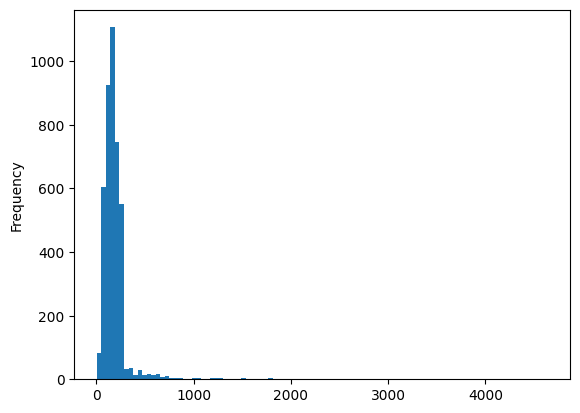

In [126]:
#mencari tau panjang text
df_drop_duplicate['length']=df_drop_duplicate['text'].apply(len)

df_drop_duplicate['length'].plot(bins=100, kind='hist')
plt.show()

In [127]:
df_drop_duplicate.describe()

,length
count,4281.000000
mean,202.568092
std,250.069810
min,7.000000
25%,120.000000
50%,168.000000
75%,217.000000
max,4643.000000


In [128]:
df_drop_duplicate[df_drop_duplicate['length'] == 45]['text'].iloc[0]

'anies sesuai selera masyarakat sumatera barat'

## Hastags Handling

In [129]:
#Mencari hastags
def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

train_df['hashtags'] = train_df['text'].apply(extract_hashtags)

hashtag_counts = train_df.groupby('label')['hashtags'].apply(lambda x: pd.Series(x.sum()).value_counts())

hashtag_table = hashtag_counts.unstack(fill_value=0)

print(hashtag_table)

                         02BangunIndustriKarbon  02KampanyeRamahLingkungan  \
label                                                                        
Demografi                                     0                          0   
Ekonomi                                       0                          0   
Geografi                                      0                          0   
Ideologi                                      0                          0   
Pertahanan dan Keamanan                       0                          0   
Politik                                       1                          0   
Sosial Budaya                                 0                          0   
Sumber Daya Alam                              0                          2   

                         02MakinSulitDisusul  02Melanjutkan  \
label                                                         
Demografi                                  0              2   
Ekonomi                       

## Merge two preprocess (Duplicate and symbol handling)

In [130]:
label = df_drop_duplicate['label']

In [131]:
df_clean = df_drop_duplicate['text'].apply(clean_text)

In [132]:
df_clean_label = pd.concat([df_clean, label], axis=1)
df_clean_label.shape

(4281, 2)

In [133]:
print_df(df_clean_label)

Label: Sumber Daya Alam
Text: kunjungan prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik indonesiasentris indonesiahijau 02melanjutkan anakmudaindonesiaemas prabowo subianto

Label: Politik
Text: anies dapat tepuk tangan meriah saat jadi rektor mewajibkan mata kuliah antikorupsi untuk memutus mata rantai korupsi aminmiskinkankoruptor

Label: Demografi
Text: emng bener sih pendukung 01 ada yg goblok begitu jg dg pendukung 02 hnya sj menurut pak ridwan kamil skemanya terbalik klo 01 mayoritas pendidikan menengah atas artinya ada jg pendidikan rendah yg milih

Label: Politik
Text: sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras apakah ini tidak standar ganda

Label: Politik
Text: anies baswedan harap asn termasuk tni dan polri pegang sumpahnya dalam pemilu

Label: Politik
Text: duh jangan sampai pak lurah de

In [134]:
# untuk membandingkan dengan raw text
print_df(train_df)

Label: Sumber Daya Alam
Text: Kunjungan Prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik. #IndonesiaSentris #IndonesiaHijau #02Melanjutkan #AnakMudaIndonesiaEmas Prabowo Subianto

Label: Politik
Text: RT Anies dapat tepuk tangan meriah saat jadi Rektor mewajibkan mata kuliah anti-korupsi untuk memutus mata rantai korupsi.. #AminMiskinkanKoruptor https://t.co/hgXsoQGaEa [RE ekowboy2]

Label: Demografi
Text: @CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= emng bener sih, pendukung 01 ada yg goblok, begitu jg dg pendukung 02.. hnya sj menurut pak Ridwan Kamil skemanya terbalik, klo 01 MAYORITAS PENDIDIKAN MENENGAH ATAS (artinya ada jg pendidikan rendah yg milih

Label: Politik
Text: RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7Q= Sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua, giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras. Apakah ini tidak standar ganda

## Stop Words Handling

In [135]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Unduh daftar stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thebl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thebl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
counter_word(df_clean_label)

,Common_words,count
0,dan,2381
1,yang,2188
2,anies,1921
3,di,1857
4,ganjar,1752
5,prabowo,1590
6,untuk,1065
7,pak,1024
8,ini,966
9,pranowo,850


In [137]:
# Daftar stopwords bahasa Indonesia (tambahkan kata-kata yang ingin dihapus)
stop_words = set(stopwords.words('indonesian'))
custom_stop_words = {'dan', 'di', 'dll', 'yg', 'jnk', 'jadi', 'sama', 'jdi'}
stop_words = stop_words.union(custom_stop_words)

# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [138]:
# Terapkan fungsi ke kolom teks
df_clean_label['text'] = df_clean_label['text'].apply(remove_stopwords)

print_df(df_clean_label)

Label: Sumber Daya Alam
Text: kunjungan prabowo meresmikan menyerahkan proyek bantuan air bersih titik indonesiasentris indonesiahijau 02melanjutkan anakmudaindonesiaemas prabowo subianto

Label: Politik
Text: anies tepuk tangan meriah rektor mewajibkan mata kuliah antikorupsi memutus mata rantai korupsi aminmiskinkankoruptor

Label: Demografi
Text: emng bener sih pendukung 01 goblok jg dg pendukung 02 hnya sj ridwan kamil skemanya terbalik klo 01 mayoritas pendidikan menengah jg pendidikan rendah milih

Label: Politik
Text: anies bersikap kritis kinerja prabowo dianggap engga sopan dianggap menghormati orang tua giliran skrg gibran tengil sok kritis dianggap kritis keras standar ganda

Label: Politik
Text: anies baswedan harap asn tni polri pegang sumpahnya pemilu

Label: Politik
Text: duh lurah denger nih acara hajatan rakyat puluhan ribu warga kendal serukan ganjar presiden kehadiran magnet puluhan ribu warga menghadiri hajatan rakyat ganjarmahfud besarnya antusiasme warga bukti jaw

## Melihat kata paling banyak dalam datset

In [139]:
counter_word(df_clean_label)

,Common_words,count
0,anies,1921
1,ganjar,1752
2,prabowo,1590
3,pranowo,850
4,mahfud,811
5,indonesia,627
6,ganjarpranowopilihanumat,556
7,capres,543
8,ganjarmahfudrebound,489
9,md,458


## Standard Rude Word Handling

In [140]:
df_clean_label[df_clean_label['text'].str.contains('', case=False)]

,text,label
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik
2,emng bener sih pendukung 01 goblok jg dg pendu...,Demografi
3,anies bersikap kritis kinerja prabowo dianggap...,Politik
4,anies baswedan harap asn tni polri pegang sump...,Politik
...,...,...
4995,ngeliat debat kemaren pas prabowo kicep kekira...,Politik
4996,masyarakat prabowogibran memiliki visi sejalan...,Politik
4997,imo both are irrational but irrational tbh but...,Ekonomi
4998,look at that ganjar sdh berkecimpung lgislatif...,Pertahanan dan Keamanan


In [141]:
rude_words = {
    "anjing":"",
    "anj":"",
    "bacot":"",
    "monyet":"",
    "babi":"",
    "goblok":"",
    "goblok-goblokin":"",
    "ngegoblok2in":"",
    "goblokgoblokin":"",
    "ngebacot":"ngatain",
    "asu":"",
    "anjirrrrr":"",
    "tolol":"bodoh",
    "anjay":"",
    "kampret":"",
    "sialan":"",
    "bangsat":"",
    "bongol":"",
    "anjir":"",
    "sundal":"",
    "jancuk":"",
    "jancok":"",
    "ndhasmu":"",
    "ndasmu":"",
    "picek":"",
    "budeg":"",
    "bego":"",
    "goblog":"",
    "kontol": "",
    "memek": "",
    "ngentot": "",
    "pepek": "",
    "tetek": "",
    "ngewe": "",
    "pantek": "",
    "taek": "",
    "setan": "",
    "bajingan": "",
    "brengsek": "",
    "pelacur": "",
    "lonte": "",
    "bencong": "",
    "banci": "",
    "telaso": "",  # slang in some regions
    "fuck": "",  # English profanity sometimes used
    "shit": "",   # English profanity sometimes used
    "cibai": "",  # loanword from Chinese slang
    "jembut": "",
    "keparat": "",
    "perek": "",
    "puki": "",
    "kolop": "",
    "kunyuk": "",
    "bejad": "",
    "biadab": "",
    "dajjal": "",
    "cuki": "",   # variant of more vulgar terms
    "pukimak": "",  # vulgar, sometimes seen in mixed language contexts
    "mampus": "",
    "babik": "",
    "kimak": "",
    "njir":"",
}

In [142]:
def preprocess_rude_word(text):
    if pd.isna(text):
        return text

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = [rude_words.get(word, word) for word in words]

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

# Fungsi untuk memproses kolom teks dalam DataFrame
def preprocess_dataframe(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_rude_word)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe(df_clean_label, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     emng bener sih pendukung 01  jg dg pendukung 0...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4995  ngeliat debat kemaren pas prabowo kicep kekira...   
4996  masyarakat prabowogibran memiliki visi sejalan...   
4997  imo both are irrational but irrational tbh but...   
4998  look at that ganjar sdh berkecimpung lgislatif...   
4999  acara memasak calon presiden nomor urut 2 meng...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4995                  Politik  
4996            

## Filter KamusAlay

In [143]:
kamus_link = "https://raw.githubusercontent.com/Pieter414/Projects/main/kamusalay.csv"
kamus = pd.read_csv(kamus_link, delimiter=",", header=None).rename(columns={0:"alay", 1:"baku"})
kamus

,alay,baku
0,ajh,saja
1,ajj,saja
2,akoh,aku
3,amaca,ah masa
4,amuh,kamu
...,...,...
234,yaw,ya
235,yoi,iya
236,yups,ya
237,yupz,ya


In [144]:
kamus_dict = kamus.set_index('alay')['baku'].to_dict()
kamus_dict

{'ajh': 'saja',
 'ajj': 'saja',
 'akoh': 'aku',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'aph': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'aq': 'saya',
 'baryaw': 'sabar ya',
 'baryw': 'sabar ya',
 'bryaw': 'sabar ya',
 'bryw': 'sabar ya',
 'bay': 'selamat tinggal',
 'besoq': 'besok',
 'beud': 'banget',
 'bhay': 'selamat tinggal',
 'bisya': 'bisa',
 'biza': 'bisa',
 'bntr': 'sebentar',
 'bokap': 'ayah',
 'bkap': 'ayah',
 'bkp': 'ayah',
 'bokaps': 'ayah',
 'bokapz': 'ayah',
 'bs': 'bisa',
 'bsa': 'bisa',
 'bsk': 'besok',
 'bsoq': 'besok',
 'bte': 'bosan',
 'bozen': 'bosan',
 'bozn': 'bosan',
 'bzn': 'bosan',
 'bzen': 'bosan',
 'cabut': 'pergi',
 'caiank': 'sayang',
 'cekola': 'sekolah',
 'cekolah': 'sekolah',
 'celalaw': 'selalu',
 'celalu': 'selalu',
 'cemungudh': 'semangat',
 'cemungut': 'semangat',
 'cemunguth': 'semangat',
 'cibuq': 'sibuk',
 'cini': 'sini',
 'ciyus': 'serius',
 'cll': 'selalu',
 'cllu': 'selalu',
 'cllw': 'selalu',
 'cpe': 'capek',
 'cpee': 'capek',
 'cewe': 'cewek',
 

In [145]:
tambahan = {
    'abahanies':'bapak anies',
    'pesanuntukabah':'pesan untuk bapak',
    'spotabahanies':'spot bapak anies',
    'abahnya':'bapaknya',
    'abahswedan':'anies',
    'humaniessayangabah':'sayang bapak',
    'hwaitingabahanies':'semangat bapak anies',
}

kamus_dict.update(tambahan)

In [146]:
df_clean_label[df_clean_label['text'].str.contains(' pecundang ', case=False)]

,text,label
3232,tega amp apatis ya penempatan sikap lo dlm ber...,Politik
4241,udah didukung presiden udah ngobok2 mk ketar k...,Politik


In [147]:
def preprocess_alay_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        if word in kamus_dict:
            corrected_word = kamus_dict[word]
            corrected_words.append(corrected_word)
            # print(f"Changed '{word}' to '{corrected_word}'")  # Logging perubahan
        else:
            corrected_words.append(word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text


# Fungsi untuk memproses kolom teks dalam DataFrame
def preprocess_dataframe2(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_alay_word)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe2(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     emng bener sih pendukung 01 juga dg pendukung ...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4995  ngeliat debat kemaren pas prabowo kicep kekira...   
4996  masyarakat prabowogibran memiliki visi sejalan...   
4997  imo both are irrational but irrational tbh but...   
4998  look at that ganjar sudah berkecimpung lgislat...   
4999  acara memasak calon presiden nomor urut 2 meng...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4995                  Politik  
4996            

## Cek Singkatan/Akronim

In [148]:
singkatan = pd.read_csv('https://raw.githubusercontent.com/aliakbars/bilp/master/singkatan-lib.csv', header=None).rename(columns={0:"singkatan", 1:"baku"})
singkatan = singkatan.set_index('singkatan')['baku'].to_dict()
singkatan

{'aja': 'saja',
 'akn': 'akan',
 'aku': 'saya',
 'amien': 'aamiin',
 'amin': 'aamiin',
 'and': 'dan',
 'anda': 'kamu',
 'ane': 'saya',
 'ap': 'apa',
 'aps': 'apa',
 'aq': 'saya',
 'bag': 'bagian',
 'banget': 'sangat',
 'beud': 'sangat',
 'bgmn': 'bagaimana',
 'bgt': 'sangat',
 'bkan': 'bukan',
 'bl': 'bila',
 'blg': 'bilang',
 'blh': 'boleh',
 'blm': 'belum',
 'blom': 'belum',
 'blum': 'belum',
 'bpk': 'bapak',
 'bs': 'bisa',
 'bsa': 'bisa',
 'bsk': 'besok',
 'cb': 'coba',
 'cm': 'hanya',
 'cma': 'hanya',
 'cuma': 'hanya',
 'd': 'di',
 'dg': 'dengan',
 'dgn': 'dengan',
 'dlm': 'dalam',
 'dn': 'dan',
 'dng': 'dengan',
 'dpt': 'dapat',
 'dr': 'dari',
 'drpd': 'daripada',
 'dsar': 'dasar',
 'dy': 'dia',
 'dya': 'dia',
 'en': 'dan',
 'enggak': 'tidak',
 'ente': 'kamu',
 'g': 'tidak',
 'ga': 'tidak',
 'gak': 'tidak',
 'gitu': 'begitu',
 'gk': 'tidak',
 'gt': 'begitu',
 'gtau': 'tidak tahu',
 'gua': 'saya',
 'gub': 'gubernur',
 'gue': 'saya',
 'gw': 'saya',
 'hny': 'hanya',
 'hrs': 'harus',


In [149]:
singkatan_added_2_link = 'https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv'
singkatan_added_2 = pd.read_csv(singkatan_added_2_link, header=None, delimiter=';').rename(columns={0:"singkatan", 1:"baku"}).set_index('singkatan')['baku'].to_dict()
singkatan.update(singkatan_added_2)

In [150]:
singkatan_added = {
    'lol':'lawak',
    'amp':'sampai',
    'smpai':'sampai',
    'dlm':'dalam',
    'lo':'kamu',
    'bener':'benar',
    'tpi':'tapi',
    'didukung':'dukung',
    'anis':'anies',
    'dsna':'sana',
    'sbg':'sebagai',
    'hr':'hari',
    'ketum':'ketua umum',
    'e':'eh',
    'jkw': 'jokowi',
    'dr': 'dari',
    'uu': 'undang-undang',
    'pake': 'pakai',
    'kt': 'kata',
    'rb': 'ribu',
    'hrsnya': 'harusnya',
    'krn': 'karena',
    'coi': 'sahabat',  # informal, tergantung konteks
    'ama': 'sama',
    'gini': 'begini',
    'euy': 'lho',
    'mending': 'lebih baik',
    'santai': 'tenang',  # Konteks ini bisa bervariasi tergantung pada penggunaan
    'ngebacot': 'bicara',  # Formalisasi dari slang
    'ngatain': 'kata',
    'kalo': 'kalau',
    'gemoysian': 'dukung prabowo',  # Kata gaul yang bisa berarti merasa kesal atau gemas
    'wowo': 'prabowo',
    'gumay': 'lucu',  # Slang, perlu konteks lebih untuk definisi tepat
    'gemoy':'lucu',
    'berkuasa': 'kuasa',
    'dibeli': 'dipilih',
    'aminajadulu': 'amin dulu saja',
    'capres': 'calon presiden',
    'cawapres': 'calon wakil presiden',
    'nahh':'nah',
    'utk':'untuk',
    'dgn':'dengan',
    'dg':'dengan',
    'ngerti':'mengerti',
    'ttg':'tentang',
    'adlh':'adalah',
    'hrs':'harus',
    'sgb':'sebagai',
    'untk':'untuk',
    'yh':'yah',
    'mgkn':'mungkin',
    'blm':'belum',
    'msk':'masuk',
    'bgt':'begitu',
    'yha':'yah',
    'aja':'saja',
    'taun':'tahun',
    'alih2':'alihalih',
    'tiba2':'tibatiba',
    'shg':'sehingga',
    'nyinyir':'cibir',
    'met':'selamat',
    'td':'tadi',
    'nan':'dan',
    'bykan':'banyakan',
    'vs':'lawan',
    'krna':'karena',
    'karna':'karena',
    'adaah':'adalah',
    'krna':'karena',
    'serem':'seram',
    'ak':'saya',
    'perna':'pernah',
    'bngt':'sekali',
    'lhoooo':'lho',
    'taaa':'ya',
    'tnidgn':'tni dengan',
    'mempertanyakn':'mempertanyakan',
    'sblum':'sebelum',
    'gitu':'begitu',
    'pnh':'pernah',
    'guys':'teman-teman',
    'mah':'yah',
    'merka':'mereka',
    'mrka':'mereka',
    'ad':'ada',
    'aamin':'amin',
    'pj':'pejabat',
    'mkin':'makin',
    'trbaik':'terbaik',
    'bencipadahal':'benci padahal',
    'benerbener':'bener-bener',
    'smntra':'sementara',
    'kmren2':'kemarin',
    'msyrkt':'masyarakat',
    'jkwdo2':'jokowi dodo',
    'ktk':'ketika',
    'ujung2nya':'ujungnya'
}

singkatan.update(singkatan_added)

In [151]:
process_df[process_df['text'].str.contains(' jadi ', case=False)]

,text,label
52,video direkam 5 april 2014 dlm acara mengadili...,Politik
324,tanah disinggung sianies semalam pnh digadaika...,Politik
381,mas gibran anak haram konstitusi kl jadi wakil...,Politik
445,kemarin bilang anies timsesnya bawa2 kpoper du...,Politik
648,jokowi bilang lahan bowok kalimantan timur 220...,Politik
655,wkwk yaa gila aja kalo kelakuannya kayak gini ...,Sosial Budaya
795,akui tanah negara tanah rakyat tanah bangsa ku...,Sosial Budaya
959,solusi anies sudah bener ya pake contrack farm...,Sumber Daya Alam
1076,orang demokrat ya mgkn blm msk partai demokrat...,Politik
1243,negara bnyk anak miskin bisa sekolah bisa maka...,Sosial Budaya


In [152]:
def preprocess_singkatan(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        # Menggunakan .get() untuk menghindari KeyError
        corrected_word = singkatan.get(word, word)  # Jika kunci tidak ada, kembalikan kata asli
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe22(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_singkatan)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe22(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     memang  benar sih pendukung 01 juga dengan pen...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4995  ngeliat debat kemarin  pas prabowo kicep kekir...   
4996  masyarakat prabowogibran memiliki visi sejalan...   
4997  imo both are irrational but irrational tbh but...   
4998  look at that ganjar sudah berkecimpung lgislat...   
4999  acara memasak calon presiden nomor urut 2 meng...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4995                  Politik  
4996            

## Filter > 25 word (Hashtag)

In [153]:
def check_long_words(text):
    words = text.split()
    return any(len(word) > 25 for word in words)

# Menerapkan fungsi ke DataFrame
process_df['check_lupa_spasi'] = process_df['text'].apply(check_long_words)

process_df

,text,label,check_lupa_spasi
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,False
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,False
2,memang benar sih pendukung 01 juga dengan pen...,Demografi,False
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,False
4,anies baswedan harap asn tni polri pegang sump...,Politik,False
...,...,...,...
4995,ngeliat debat kemarin pas prabowo kicep kekir...,Politik,False
4996,masyarakat prabowogibran memiliki visi sejalan...,Politik,False
4997,imo both are irrational but irrational tbh but...,Ekonomi,False
4998,look at that ganjar sudah berkecimpung lgislat...,Pertahanan dan Keamanan,False


In [154]:
kamus_long = {
    'munculfenomenapakbowo':'muncul fenomena bapak prabowo',
    'terukurganjarmahfudrebound':'terukur ganjar mahfud rebound',
    'ganjarpranowopilihanumat':'ganjar pranowo pilihan umat',
    'k5cwvm0ta1xpchveyhoebrkxuugg2':'',
    'indonesiakuatindonesiamaju':'indonesia kuat indonesia maju',
    'prabowogibran':'prabowo gibran',
    'diplomasiprogresif02':'diplomasi progresif 02',
    'industripertahananbelaprabowo':'industri pertahanan bela prabowo',
    'perempuanganjarmahfudrebound':'perempuan ganjar mahfud rebound',
    'prabowogibranmenangsatuputaran':'prabowo gibran menang satu putaran',
    'prabowogibran2024':'prabowo gibran 2024',
    'pahitmaniesalwayswithanies':'pahit manies always with anies',
    '02melanjutkan':'02 melanjutkan',
    '2024ganjarpranowopilihanumat':'2024 ganjar pranowo pilihan umat',
    'indonesiaganjarmahfudrebound':'indonesia ganjar mahfud rebound',
    'mendatangganjarmahfudrebound':'mendatang ganjar mahfud rebound',
    'bangsaganjarpranowopilihanumat':'bangsa ganjar pranowo pilihan umat',
    'ganjarpranowopilihanumat2024':'ganjar pranowo pilihan umat 2024',
    'ganjarpranowopranowopilihanumat':'ganjar pranowo pilihan umat',
    'jokowiganjarmahfudrebound':'joko wiganjar mahfud rebound',
    'rfk3fa9s5b8mqjhtm8ihhjsjgbmg6wuitrqadill':'',
    'kecilganjarpranowopilihanumat':'kecil ganjar pranowo pilihan umat',
    'ganjarmahfudrebound':'ganjar mahfud rebound',
    'ganjarpranowopranowopilihanumat2024':'ganjar pranowo pilihan umat 2024',
    'pranowoganjarmahfudrebound':'pranowo ganjar mahfud rebound',
    '2024jokowidigantiganjar':'2024 jokowi diganti ganjar',
    'negaraganjarpranowopilihanumat':'negara ganjar pranowo pilihan umat',
    'perempuanganjarpranowopranowopilihanumat':'perempuan ganjar pranowo pilihan umat',
    'pancasilaganjarmahfudrebound':'pancasila ganjar mahfud rebound',
    'iniganjarpranowopilihanumat':'ini ganjar pranowo pilihan umat',
    'perubahanganjarmahfudrebound':'perubahan ganjar mahfud rebound',
    'sesungguhnyapolitikperubahan':'sesungguhnya politik perubahan',
    'investasiganjarmahfudrebound': 'investasi ganjar mahfud rebound',
    'masyarakatganjarpranowopilihanumat': 'masyarakat ganjar pranowo pilihan umat',
    'ganjarpranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'bersamaganjarmahfudrebound': 'bersama ganjar mahfud rebound',
    'nelayanpelampiasanganjarpranowopilihanumat': 'nelayan pelampiasan ganjar pranowo pilihan umat',
    'programganjarmahfudrebound': 'program ganjar mahfud rebound',
    'terlindungiganjarpranowopilihanumat': 'terlindungan ganjar pranowo pilihan umat',
    'ganjarpranowopranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'dimengertiganjarmahfudrebound':'dimengerti ganjar mahfud rebound',
    'dipahamiganjarmahfudrebound': 'dipahami ganjar mahfud rebound',
    'pelanggaranganjarpranowopilihanumat': 'pelanggaran ganjar pranowo pilihan umat',
    'ganjarpranowopranowopranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'paslon02wajibdidiskualifikasi': 'paslon 02 wajib didiskualifikasi',
    'masyarakatganjarmahfudrebound': 'masyarakat ganjar mahfud rebound',
    'santrimasadepanganjarpranowopilihanumat': 'santri masa depan ganjar pranowo pilihan umat',
    'desadesaganjarmahfudrebound': 'desa desa ganjar mahfud rebound',
    '4hvj60pdrlxq6lurvrj0znk9sylcvxeg7syrbwytc':'',
    'ganjarmahfudpilihanrealistis': 'ganjar mahfudp pilihan realistis',
    'kss,_x000d_':'',
    '_x000d_':'',
    'ganjarmahfud2024_x000d_': 'ganjar mahfud 2024',
    'dulujokowisekarangganjar_x000d_': 'dulu jokowi sekarang ganjar',
    'korupsiganjarpranowopranowopilihanumat': 'korupsi ganjar pranowo pilihan umat',
    'azkjqeqevol30kgnsh0ojvfgvnllxh33a3gtqjehvrisf9vdtekbsbptsudlle':'',
    'vnekshbzb20pnosmwlx2hvpwd0dxb6ro13kiyvd2lg1ktihjcbnvgsxmcfyk':'',
    'mdganjarpranowopilihanumat': 'md ganjar pranowo pilihan umat',
    'perjuanganteladanperjuangan': 'perjuangan teladan perjuangan',
    'hwc3edacbqzmfdka2qucamvcclzib':'',
    'misibanggaganjarpranowopilihanumat':'',
    'ugi6vohxo3g7mpc64bl4fymweut7kj5bvv6akmr1':'',
    'airganjarpranowopilihanumat': 'air ganjar pranowo pilihan umat',
    'keberanianganjarmahfudrebound': 'keberanian ganjar mahfud rebound',
    'kitaganjarpranowopilihanumat': 'kita ganjar pranowo pilihan umat',
    'pemerintahganjarmahfudrebound': 'pimpinan ganjar mahfud rebound',
    'stadiuminternationaluntukindonesia': 'stadium international untuk indonesia',
    'rumitganjarpranowopilihanumat': 'rumit ganjar pranowo pilihan umat',
    'dulujokowisekarangganjar': 'dulu jokowi sekarang ganjar',
    'indekspertahanankeamananbgtu': 'indeks pertahanan keamanan bgtu',
    'kitaganjarpranowopilihanumat':'kita ganjar pranowo pilihan umat',
    'ramahganjarpranowopilihanumat': 'ramah ganjar pranowo pilihan umat',
    'optimalganjarmahfudrebound': 'optimalisasi ganjar mahfud rebound',
    'temanalamganjar':'teman alam ganjar',
    'wargaganjarpranowopilihanumat': 'warga ganjar pranowo pilihan umat',
    'korupsiganjarmahfudrebound': 'korupsi ganjar mahfud rebound',
    '2xso7lye7g13ytrd1uert87enrq5m':'',
    'prabowoterpercayalawankorupsi': 'prabowo terpercaya lawan korupsi',
    'antikorupsiganjarpranowopranowopilihanumat': 'anti korupsi ganjar pranowo pilihan umat',
    'sendiriganjarpranowopilihanumat': 'sendiri ganjar pranowo pilihan umat',
    'kitaganjarpranowopilihanumat': 'kita ganjar pranowo pilihan umat',
    'investorganjarmahfudrebound': 'investasi ganjar mahfud rebound',
    'baikganjarpranowopilihanumat': 'baik ganjar pranowo pilihan umat',
    'temantemanganjarmahfudrebound': 'teman teman ganjar mahfud rebound',
    'kalahkancaprespenculik': 'kalahkan capres penculik',
    'orangbaiktidakpilihpenculik': 'orang baik tidak pilih penculik',
    'lawandinastipolitik': 'lawan dinasti politik',
    'majuganjarpranowopilihanumat': 'maju ganjar pranowo pilihan umat',
    'mahfudganjar2024ganjarpranowopilihanumat': 'mahfud ganjar 2024 pranowo pilihan umat',
    'itcskubqkfvsomfw5pt8xo5zbz54p4ppnxgllrz5wvwhmkc8farp8wzppyrdo':'',
    'me2x5abwpgnmherl5x8euykquevawk0vbbwolgl':'',
    'pahamrakyatganjarpranowopilihanumat': 'paham rakyat ganjar pranowo pilihan umat',
    'sendiriganjarmahfudrebound': 'sendiri ganjar mahfud rebound',
    'menggeliatganjarmahfudrebound': 'menggeliat ganjar mahfud rebound',
    'rakyatnyaganjarpranowopilihanumat': 'rakyatnya ganjar pranowo pilihan umat',
    'atikohibunegara':'atikoh ibu negara',
    'aminsatukanindonesia': 'aman satuukan indonesia',
    'aminpalingsiapuntukindonesia': 'aman paling siap untuk indonesia',
    'proporsionalitasefektivitas': 'proporsionalitas efektifitas',
    'dipercayaganjarmahfudrebound': 'dipercaya ganjar mahfud rebound',
    'straightforwardganjarmahfudrebound': 'straightforward ganjar mahfud rebound',
    'pilihganjarpranowomahfudmd': 'pilih ganjar pranowo mahfud md',
    'kmzh65bpa31momfrj5hoqkkpnapzvqx2kwx':'',
    'keluargaganjarmahfudrebound': 'keluarga ganjar mahfud rebound',
    'misidekatganjarpranowopilihanumat': 'misi dekat ganjar pranowo pilihan umat',
    'ganjarganjarganjarpresiden': 'ganjar presiden',
    'menangmenangmenang':'menang menang menang',
    'indonesiaganjarpranowopilihanumat':'indonesia ganjar pranowo pilihan umat',
    'maksimalganjarmahfudrebound': 'maksimal ganjar mahfud rebound',
    'terlewatganjarmahfudrebound': 'terlewat ganjar mahfud rebound',
    'nelayankeluarganjarpranowopilihanumat': 'nelayan keluarga ganjar pranowo pilihan umat',
    'diaksesganjarmahfudrebound': 'diakses ganjar mahfud rebound',
    'wakandanomoreindonesiaforever': 'wakanda no more indonesia forever',
    'tersenyumlahberbanggalahbersemangatlah':'tersenyumlah berbanggalah bersemangatlah',
    'pilihganjarpranowomahfudmdysn23bf':'pilih ganjar pranowo mahfud md',
    'inspiratifganjarpranowopilihanumat':'inspiratif ganjar pranowo pilihan umat',
    'aminpalingsiapuntukindonesia': 'aman paling siap untuk indonesia',
    'pentingganjarmahfudrebound': 'penting ganjar mahfud rebound',
    'perjuanganganjarpranowopilihanumat': 'perjuangan ganjar pranowo pilihan umat',
    'akarakarnyaganjarpranowopilihanumat': 'akar akarnya ganjar pranowo pilihan umat',
    'wilayahganjarpranowopranowopilihanumat': 'wilayah ganjar pranowo pilihan umat',
    'perjuanganganjarpranowopranowopilihanumat': 'perjuangan ganjar pranowo pilihan umat',
    'keadilanganjarpranowopilihanumat': 'kepadilangan ganjar pranowo pilihan umat',
    'pilihganjarpranowomahfudmd': 'pilih ganjar pranowo mahfud md',
    'lchztrxi8kjddgx5webzlkhqtaffv0pjqia6':'',
    'katamerekakitakalahmasukpenjara': 'kata mereka kita kalah masuk penjara',
    'terwujudganjarmahfudrebound': 'terwujud ganjar mahfud rebound',
    'kesejahteraanganjarberaksi': 'kesejahteraan ganjar beraksi',
    'tinggalganjarmahfudrebound': 'tinggal ganjar mahfud rebound',
    'sebelumnyaganjarmahfudrebound': 'sebelumnya ganjar mahfud rebound',
    '1ml9mlahrjpaon7swdklxhbzsj7':'',
    'dehganjarpranowopranowopilihanumat': 'deh ganjar pranowo pilihan umat',
}

In [155]:
def preprocess_long_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        # Menggunakan .get() untuk menghindari KeyError
        corrected_word = kamus_long.get(word, word)  # Jika kunci tidak ada, kembalikan kata asli
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe3(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_long_word)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe3(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     memang benar sih pendukung 01 juga dengan pend...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4995  ngeliat debat kemarin pas prabowo kicep kekira...   
4996  masyarakat prabowo gibran memiliki visi sejala...   
4997  imo both are irrational but irrational tbh but...   
4998  look at that ganjar sudah berkecimpung lgislat...   
4999  acara memasak calon presiden nomor urut 2 meng...   

                        label  check_lupa_spasi  
0            Sumber Daya Alam             False  
1                     Politik             False  
2                   Demografi             False  
3                     Politik             False  
4                     

In [156]:
process_df['check_lupa_spasi'] = process_df['text'].apply(check_long_words)

In [157]:
process_df[process_df['check_lupa_spasi']]

,text,label,check_lupa_spasi


In [158]:
process_df.drop(columns= ['check_lupa_spasi'], inplace=True)

## Filter Bowo dan Abah (Nama Yang Terlibat)

In [159]:
process_df[process_df['text'].str.contains(r'\bbowo\b', case=False, regex=True)]

,text,label
92,anies baswedan mas bowo wawasan calon presiden...,Politik
708,keren calon presiden ganjar pranowo mas bowo a...,Politik
1303,dedikasi mas bowo nkri berdaulat merdeka ekono...,Politik
1485,anies baswedan mas bowo terkenal calon preside...,Politik
1535,anies baswedan mas bowo wawasan calon presiden...,Politik
2248,presiden jokowi tidak malu tidak fatsum politi...,Politik
2253,bowo rakyat berebut bingkisan anies rakyat ber...,Politik
2494,calon presiden ganjar pranowo kekinian mas bow...,Politik
2505,keren pilih calon presiden ganjar pranowo mas ...,Ideologi
2595,anies langsung masuk substansi permasalah pert...,Pertahanan dan Keamanan


In [160]:
issue_bowo = {
    'bowo':'prabowo',
    'ganjarmahfud': 'ganjar mahfud',
    'ganjarmahfud2024': 'ganjar mahfud 2024',
    'aniescak':'anies cak',
    'aniesimin':'anies imin'
}

In [161]:
def preprocess_weird_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        # Menggunakan .get() untuk menghindari KeyError
        corrected_word = issue_bowo.get(word, word)  # Jika kunci tidak ada, kembalikan kata asli
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe4(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_weird_word)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe4(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     memang benar sih pendukung 01 juga dengan pend...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4995  ngeliat debat kemarin pas prabowo kicep kekira...   
4996  masyarakat prabowo gibran memiliki visi sejala...   
4997  imo both are irrational but irrational tbh but...   
4998  look at that ganjar sudah berkecimpung lgislat...   
4999  acara memasak calon presiden nomor urut 2 meng...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4995                  Politik  
4996            

In [162]:
process_df[process_df['text'].str.contains(r'\babah\b', case=False, regex=True)]

,text,label


In [163]:
process_df[process_df['text'].str.contains(r'\bbowo\b', case=False, regex=True)]

,text,label


In [164]:
process_df[process_df['text'].str.contains(r'\bganjarmahfud\b', case=False, regex=True)]

,text,label


In [165]:
process_df[process_df['text'].str.contains(r'\baniescak\b', case=False, regex=True)]

,text,label


In [166]:
process_df[process_df['text'].str.contains(r'\baniesimin\b', case=False, regex=True)]

,text,label


## Filter > 20 word (Hashtag)

In [167]:
def check_long_words(text):
    words = text.split()
    return any(len(word) > 20 for word in words)

# Menerapkan fungsi ke DataFrame
process_df['check_lupa_spasi'] = process_df['text'].apply(check_long_words)

process_df

,text,label,check_lupa_spasi
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,True
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,True
2,memang benar sih pendukung 01 juga dengan pend...,Demografi,False
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,False
4,anies baswedan harap asn tni polri pegang sump...,Politik,False
...,...,...,...
4995,ngeliat debat kemarin pas prabowo kicep kekira...,Politik,False
4996,masyarakat prabowo gibran memiliki visi sejala...,Politik,False
4997,imo both are irrational but irrational tbh but...,Ekonomi,False
4998,look at that ganjar sudah berkecimpung lgislat...,Pertahanan dan Keamanan,False


In [168]:
kamus_20 = {
    'anakmudaindonesiaemas': 'anak muda indonesia emas',
    'ganjarmahfudm3nangdebat': 'ganjar mahfud menang debat',
    'ganjarpresidenrakyat': 'ganjar presiden rakyat',
    '3mandatganjarmahfud': '3 mandat ganjar mahfud',
    'mdpranowopilihanumat': 'md pranowo pilihan umat',
    '02menangkanhatirakyat':'02 menang hati rakyat',
    'bersamaindonesiamaju': 'bersama indonesia maju',
    'ganjarpranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'ganjarpranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'kamikabarkanandaputuskan': 'kamika kabarkan andaputuskan',
    'ganjarpranowopranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'bersamaprabowogibran': 'bersama prabowo gibran',
    'ganjarpranowopranowopranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'kratonbersamarakyat':'kraton bersama rakyat',
    'kosongduasatuputaran': 'kosong dua satu putaran',
    'jnkbersamaganjarmahfud':'jnk bersama ganjar mahfud',
    'pilihprabowogibran02':'pilih prabowo gibran 2',
    'kebenaranpastimenang':'kebenaran pasti menang',
    'generasigotongroyong':'generasi gotong royong',
    '2024ganjarmahfudrebound': '2024 ganjar mahfud rebound',
}

In [169]:
def preprocess_long_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        # Menggunakan .get() untuk menghindari KeyError
        corrected_word = kamus_20.get(word, word)  # Jika kunci tidak ada, kembalikan kata asli
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe3(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_long_word)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe3(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     memang benar sih pendukung 01 juga dengan pend...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4995  ngeliat debat kemarin pas prabowo kicep kekira...   
4996  masyarakat prabowo gibran memiliki visi sejala...   
4997  imo both are irrational but irrational tbh but...   
4998  look at that ganjar sudah berkecimpung lgislat...   
4999  acara memasak calon presiden nomor urut 2 meng...   

                        label  check_lupa_spasi  
0            Sumber Daya Alam              True  
1                     Politik              True  
2                   Demografi             False  
3                     Politik             False  
4                     

In [170]:
process_df['check_lupa_spasi'] = process_df['text'].apply(check_long_words)

In [171]:
process_df[process_df['check_lupa_spasi']]

,text,label,check_lupa_spasi
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,True
21,calon presiden ri ganjar pranowo mahfud md reg...,Politik,True
46,wiranto langsung bergerak cepat dukungan prabo...,Politik,True
74,uvsdec4fpmwdnpq1ojaod2ou,Sosial Budaya,True
137,kiki_daliyo ganjar pranowo sikap disitulah gan...,Ideologi,True
...,...,...,...
4783,ccmqlqp2mio07qvjvwkgpwbt,Sosial Budaya,True
4828,rabu januari calon presiden no 3 ganjar pranow...,Sumber Daya Alam,True
4914,sosok ganjar pranowo prof mahfud role model an...,Politik,True
4923,kecintaan masyarakat magetan ganjar pranowo ga...,Politik,True


In [172]:
process_df.drop(columns= ['check_lupa_spasi'], inplace=True)

## Review Word Up to This Point

In [173]:
counter_word(process_df)

,Common_words,count
0,ganjar,3791
1,mahfud,2071
2,anies,1960
3,prabowo,1925
4,pranowo,1471
5,presiden,1147
6,calon,890
7,indonesia,852
8,pilihan,686
9,2024,670


In [174]:
counter_word2(process_df, 13)

,Common_words,count
0,indonesiasentris,72
1,indonesiahijau,71
2,mahfudlebihbaik3,53
3,aniesmuhaimin2024,51
4,asalbukanprabowo,36
5,programprogram,32
6,jabartetapuntuk02,31
7,untukmasyarakat,29
8,02untukmelanjutkan,27
9,ganjarpresiden,25


## Drop useless column/Weird Column that serve no purpose

In [175]:
# # drop data 304, 1952
# process_df.drop(index=[304, 1952], inplace=True)

## Check New Procedures

In [176]:
process_df

,text,label
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik
2,memang benar sih pendukung 01 juga dengan pend...,Demografi
3,anies bersikap kritis kinerja prabowo dianggap...,Politik
4,anies baswedan harap asn tni polri pegang sump...,Politik
...,...,...
4995,ngeliat debat kemarin pas prabowo kicep kekira...,Politik
4996,masyarakat prabowo gibran memiliki visi sejala...,Politik
4997,imo both are irrational but irrational tbh but...,Ekonomi
4998,look at that ganjar sudah berkecimpung lgislat...,Pertahanan dan Keamanan


# TO DO LIST

- Mengurus Typo
- Stemming Word
- BERT model




# Modeling

## Multinomial NB + TfidVectorizer

In [13]:
import pandas as pd

In [14]:
process_df = pd.read_csv('C:\\Users\\thebl\\Documents\\Lomba\\SatDat2024\\FullSenyum-SatriaData2024\\Code\\BCC FullSenyum - Pieter\\piet_cleaning.csv')
process_df

,Unnamed: 0,text,label
0,0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam
1,1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik
2,2,memang benar sih pendukung 01 juga dengan pend...,Demografi
3,3,anies bersikap kritis kinerja prabowo dianggap...,Politik
4,4,anies baswedan harap asn tni polri pegang sump...,Politik
...,...,...,...
4276,4995,ngeliat debat kemarin pas prabowo kicep kekira...,Politik
4277,4996,masyarakat prabowo gibran memiliki visi sejala...,Politik
4278,4997,imo both are irrational but irrational tbh but...,Ekonomi
4279,4998,look at that ganjar sudah berkecimpung lgislat...,Pertahanan dan Keamanan


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [16]:
process_df['stemmed_text'] = process_df['text']
encoding_dict = {
    'Politik':0,
    'Sosial Budaya':1,
    'Pertahanan dan Keamanan':2,
    'Ideologi':3,
    'Ekonomi':4,
    'Sumber Daya Alam':5,
    'Demografi':6,
    'Geografi':7,
}

# Fitting and transforming the 'Category' column
process_df['encoded_label'] = process_df['label'].map(encoding_dict)

In [6]:
process_df

,Unnamed: 0,text,label,stemmed_text,encoded_label
0,0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,kunjungan prabowo meresmikan menyerahkan proye...,5
1,1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,anies tepuk tangan meriah rektor mewajibkan ma...,0
2,2,memang benar sih pendukung 01 juga dengan pend...,Demografi,memang benar sih pendukung 01 juga dengan pend...,6
3,3,anies bersikap kritis kinerja prabowo dianggap...,Politik,anies bersikap kritis kinerja prabowo dianggap...,0
4,4,anies baswedan harap asn tni polri pegang sump...,Politik,anies baswedan harap asn tni polri pegang sump...,0
...,...,...,...,...,...
4276,4995,ngeliat debat kemarin pas prabowo kicep kekira...,Politik,ngeliat debat kemarin pas prabowo kicep kekira...,0
4277,4996,masyarakat prabowo gibran memiliki visi sejala...,Politik,masyarakat prabowo gibran memiliki visi sejala...,0
4278,4997,imo both are irrational but irrational tbh but...,Ekonomi,imo both are irrational but irrational tbh but...,4
4279,4998,look at that ganjar sudah berkecimpung lgislat...,Pertahanan dan Keamanan,look at that ganjar sudah berkecimpung lgislat...,2


In [7]:
# Fitting and transforming the 'Category' column
X_train, X_test, y_train, y_test = train_test_split(
    process_df.stemmed_text,
    process_df.encoded_label,
    test_size=0.2,
    random_state=48,
)

In [8]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vectorizer_tfid',TfidfVectorizer()),
    ('Multi NB',MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       593
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00        52
           5       0.00      0.00      0.00        24
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         2

    accuracy                           0.69       857
   macro avg       0.09      0.12      0.10       857
weighted avg       0.48      0.69      0.57       857



c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
from sklearn.metrics import classification_report, balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

Balanced Accuracy: 0.12


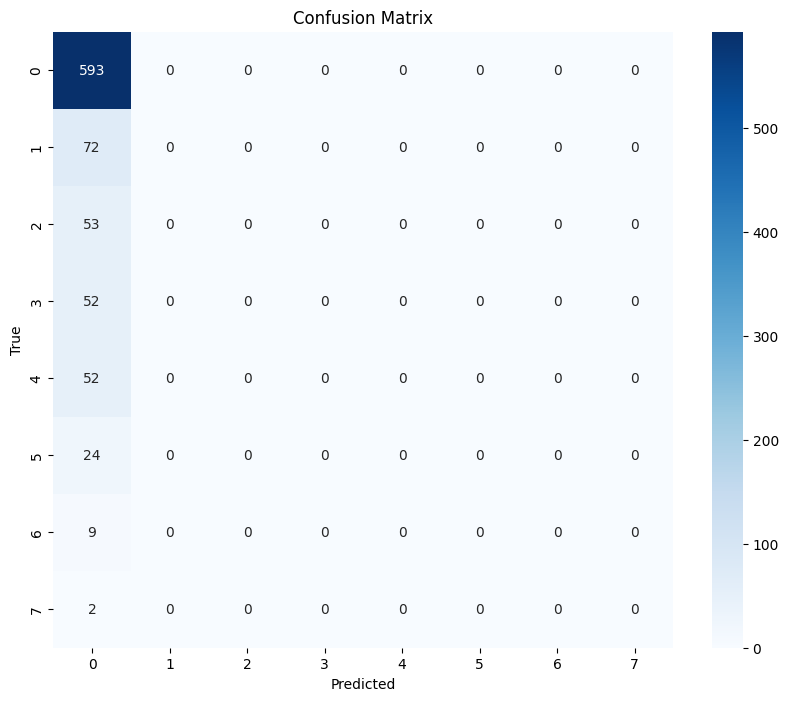

In [10]:
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.49      0.64       593
           1       0.33      0.54      0.41        72
           2       0.34      0.66      0.45        53
           3       0.27      0.54      0.36        52
           4       0.33      0.77      0.46        52
           5       0.19      0.42      0.26        24
           6       0.15      0.44      0.22         9
           7       0.10      0.50      0.17         2

    accuracy                           0.52       857
   macro avg       0.33      0.54      0.37       857
weighted avg       0.72      0.52      0.56       857

Balanced Accuracy: 0.54
Confusion Matrix:
 [[290  56  59  69  69  25  20   5]
 [ 11  39   3   5   6   7   1   0]
 [  6   5  35   1   1   3   1   1]
 [  7   6   4  28   3   4   0   0]
 [  3   2   1   1  40   4   0   1]
 [  3   5   0   0   3  10   1   2]
 [  0   3   1   1   0   0   4   0]
 [  0   1   0   0   0   0   0   1]]


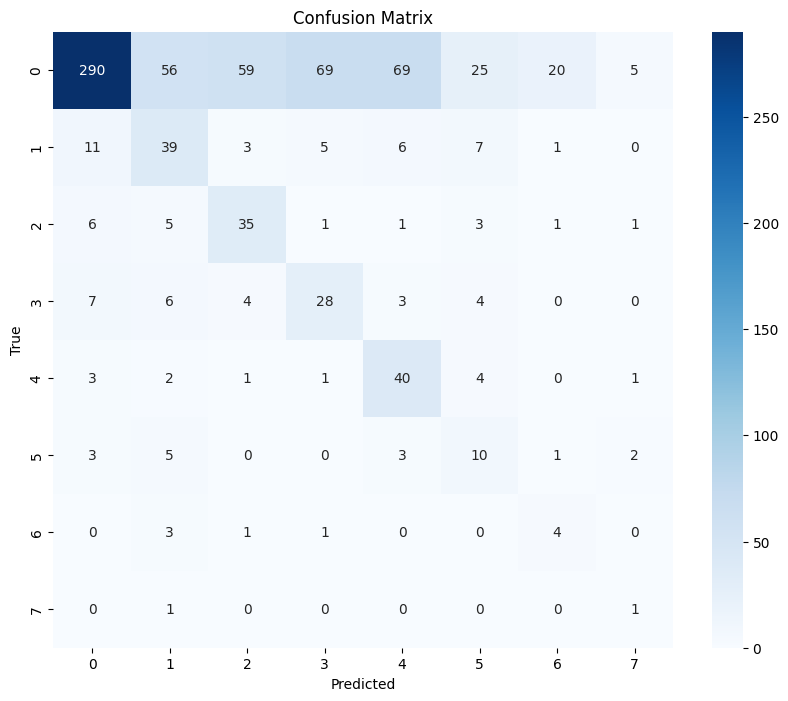

In [12]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=102)),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Complement Naive Bayes

In [185]:
# Fitting and transforming the 'Category' column
X_train, X_test, y_train, y_test = train_test_split(
    process_df.stemmed_text,
    process_df.encoded_label,
    test_size=0.2,
    random_state=48,
)

In [186]:
from sklearn.naive_bayes import ComplementNB
clf = Pipeline([
    ('vectorizer_tfid',TfidfVectorizer()),
    ('Complement NB',ComplementNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       593
           1       0.59      0.22      0.32        72
           2       0.57      0.23      0.32        53
           3       0.81      0.25      0.38        52
           4       0.71      0.38      0.50        52
           5       0.67      0.17      0.27        24
           6       0.50      0.11      0.18         9
           7       0.00      0.00      0.00         2

    accuracy                           0.74       857
   macro avg       0.58      0.29      0.35       857
weighted avg       0.72      0.74      0.69       857



In [187]:
from sklearn.metrics import classification_report, balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

Balanced Accuracy: 0.29


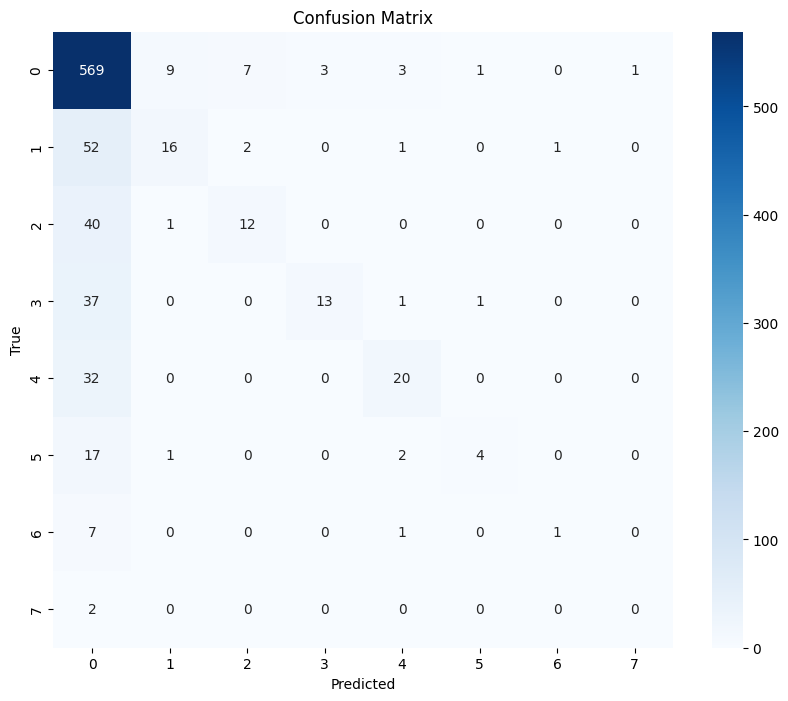

In [188]:
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.40      0.56       593
           1       0.30      0.43      0.35        72
           2       0.30      0.68      0.41        53
           3       0.27      0.56      0.36        52
           4       0.34      0.75      0.47        52
           5       0.15      0.42      0.22        24
           6       0.11      0.56      0.19         9
           7       0.03      0.50      0.05         2

    accuracy                           0.45       857
   macro avg       0.30      0.54      0.33       857
weighted avg       0.72      0.45      0.50       857

Balanced Accuracy: 0.54
Confusion Matrix:
 [[237  54  74  71  64  38  29  26]
 [ 10  31   5   7   5   8   4   2]
 [  5   3  36   1   1   4   1   2]
 [  3   6   4  29   2   3   3   2]
 [  2   2   2   1  39   5   0   1]
 [  1   3   0   0   3  10   3   4]
 [  0   3   1   0   0   0   5   0]
 [  0   1   0   0   0   0   0   1]]


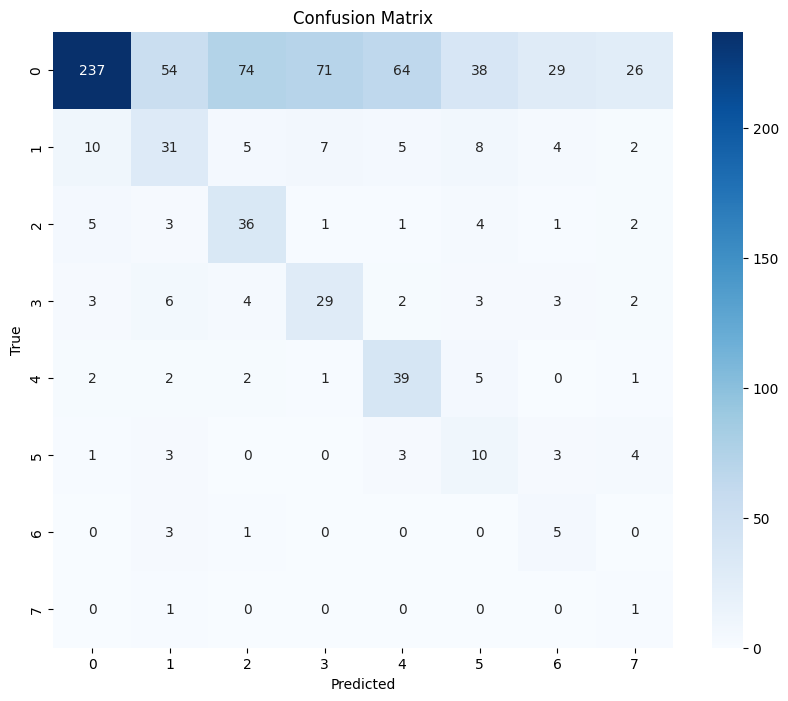

In [189]:
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=420)),
    ('Complement NB', ComplementNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Hypertuning MNB

In [190]:
!pip install optuna

In [191]:
import optuna
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics

In [192]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        'vectorizer_tfid__max_df': trial.suggest_float('max_df', 0.7, 1.0),
        'vectorizer_tfid__min_df': trial.suggest_int('min_df', 1, 5),
        'vectorizer_tfid__ngram_range': trial.suggest_categorical('ngram_range', [(1, 1), (1, 2), (1, 3)]),
        'Multi_NB__alpha': trial.suggest_float('alpha', 0.0001, 10.0, log=True),
        'Multi_NB__fit_prior': trial.suggest_categorical('fit_prior', [True, False]),
    }

    # Create pipeline with preprocessing, oversampling, and classifier
    clf = Pipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('smote', SMOTE(random_state=42)),
        ('Multi_NB', MultinomialNB())
    ])

    clf.set_params(**params)

    # Perform cross-validation
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    balanced_acc = balanced_accuracy_score(y_train, y_pred)
    return balanced_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust the number of trials as needed

best_params = study.best_params
best_balanced_accuracy = study.best_value

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_balanced_accuracy)

[I 2024-06-17 18:36:33,288] A new study created in memory with name: no-name-2e2c55ff-d207-4b75-858f-17605c496912
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 3) which is of type tuple.
  warnings.warn(m

Best Parameters: {'max_df': 0.7526855546740371, 'min_df': 4, 'ngram_range': (1, 1), 'alpha': 4.246597295069946, 'fit_prior': True}
Best Balanced Accuracy: 0.4853931513277451


Best Parameters: {'max_df': 0.7934048320367862, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 2.052022106650553, 'fit_prior': True}
Best Balanced Accuracy: 0.4779936617706554

In [193]:
best_params = {'max_df': 0.7934048320367862, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 2.052022106650553, 'fit_prior': True}

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('Multi_NB', MultinomialNB())
])

              precision    recall  f1-score   support

           0       0.90      0.34      0.49       593
           1       0.33      0.47      0.39        72
           2       0.29      0.68      0.41        53
           3       0.22      0.50      0.30        52
           4       0.29      0.73      0.41        52
           5       0.15      0.46      0.22        24
           6       0.10      0.56      0.17         9
           7       0.04      0.50      0.07         2

    accuracy                           0.41       857
   macro avg       0.29      0.53      0.31       857
weighted avg       0.70      0.41      0.45       857

Balanced Accuracy: 0.5295958042928397


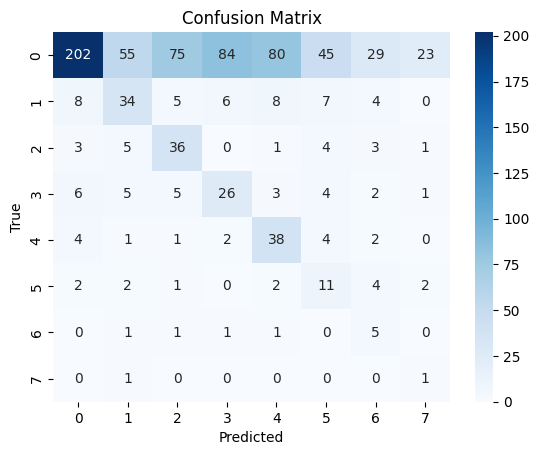

In [194]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': best_params['max_df'],
    'vectorizer_tfid__min_df': best_params['min_df'],
    'vectorizer_tfid__ngram_range': best_params['ngram_range'],
    'Multi_NB__alpha': best_params['alpha'],
    'Multi_NB__fit_prior': best_params['fit_prior']
}

clf.set_params(**updated_best_params)

# Fit on the entire training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Hypertuning CNB

In [195]:
import optuna
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics

In [196]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        'vectorizer_tfid__max_df': trial.suggest_float('max_df', 0.7, 1.0),
        'vectorizer_tfid__min_df': trial.suggest_int('min_df', 1, 5),
        'vectorizer_tfid__ngram_range': trial.suggest_categorical('ngram_range', [(1, 1), (1, 2), (1, 3)]),
        'Complement NB__alpha': trial.suggest_float('alpha', 0.0001, 10.0, log=True),  # Corrected line
        'Complement NB__fit_prior': trial.suggest_categorical('fit_prior', [True, False]),  # Corrected line
    }

    # Create pipeline with preprocessing, oversampling, and classifier
    clf = Pipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('smote', SMOTE(random_state=42)),
        ('Complement NB', ComplementNB())  # Ensure this name matches in set_params
    ])

    clf.set_params(**params)

    # Perform cross-validation
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    balanced_acc = balanced_accuracy_score(y_train, y_pred)
    return balanced_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust the number of trials as needed

best_params = study.best_params
best_balanced_accuracy = study.best_value

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_balanced_accuracy)

[I 2024-06-17 18:37:05,523] A new study created in memory with name: no-name-dd669529-b034-4412-94d8-e619f37a54c3
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 3) which is of type tuple.
  warnings.warn(m

Best Parameters: {'max_df': 0.975242340297564, 'min_df': 4, 'ngram_range': (1, 1), 'alpha': 8.799396264538569, 'fit_prior': False}
Best Balanced Accuracy: 0.4830536439799269


Best Parameters: {'max_df': 0.810499900438489, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 5.033783532676743, 'fit_prior': False}
Best Balanced Accuracy: 0.4878113146873241

In [197]:
best_params = {'max_df': 0.810499900438489, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 5.033783532676743, 'fit_prior': False}

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('Complement NB', MultinomialNB())
])

              precision    recall  f1-score   support

           0       0.90      0.28      0.43       593
           1       0.32      0.40      0.36        72
           2       0.28      0.68      0.39        53
           3       0.22      0.52      0.31        52
           4       0.27      0.75      0.39        52
           5       0.14      0.42      0.21        24
           6       0.07      0.56      0.12         9
           7       0.03      0.50      0.05         2

    accuracy                           0.37       857
   macro avg       0.28      0.51      0.28       857
weighted avg       0.70      0.37      0.40       857

Balanced Accuracy: 0.5129260748280007


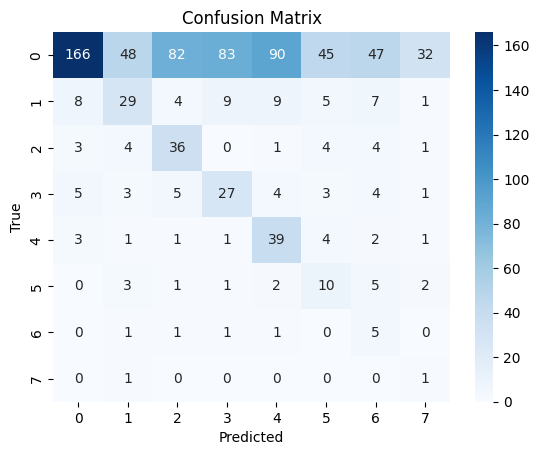

In [198]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': best_params['max_df'],
    'vectorizer_tfid__min_df': best_params['min_df'],
    'vectorizer_tfid__ngram_range': best_params['ngram_range'],
    'Complement NB__alpha': best_params['alpha'],
    'Complement NB__fit_prior': best_params['fit_prior']
}

clf.set_params(**updated_best_params)

# Fit on the entire training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Export

In [199]:
process_df[['text', 'label']].to_csv('piet_cleaning.csv')

In [200]:
process_df

,text,label,stemmed_text,encoded_label
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,kunjungan prabowo meresmikan menyerahkan proye...,5
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,anies tepuk tangan meriah rektor mewajibkan ma...,0
2,memang benar sih pendukung 01 juga dengan pend...,Demografi,memang benar sih pendukung 01 juga dengan pend...,6
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,anies bersikap kritis kinerja prabowo dianggap...,0
4,anies baswedan harap asn tni polri pegang sump...,Politik,anies baswedan harap asn tni polri pegang sump...,0
...,...,...,...,...
4995,ngeliat debat kemarin pas prabowo kicep kekira...,Politik,ngeliat debat kemarin pas prabowo kicep kekira...,0
4996,masyarakat prabowo gibran memiliki visi sejala...,Politik,masyarakat prabowo gibran memiliki visi sejala...,0
4997,imo both are irrational but irrational tbh but...,Ekonomi,imo both are irrational but irrational tbh but...,4
4998,look at that ganjar sudah berkecimpung lgislat...,Pertahanan dan Keamanan,look at that ganjar sudah berkecimpung lgislat...,2
